In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

In [4]:
data1_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)/data1.csv"
target1_path = "/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)/target1.csv"

## Chargement des données et visualisation 
data = pd.read_csv(data1_path)
target = pd.read_csv(target1_path)

## Utiliser la fonction de l'exercice 1 pour remplacer les valeurs manquantes
data = replace_random_value(data)

In [27]:
from sklearn.metrics import mutual_info_score

def information_mutuelle(data,bins=20):
    """"Retourne la matrice d'information mutuelle"""

    # Initialisation de la matrice d'information mutuelle
    num_variables = data.shape[1]  # Nombre de variables
    mutual_info_matrix = np.zeros((num_variables, num_variables))

    # Calcul de l'information mutuelle pour chaque paire de variables
    for i in range(num_variables):
        for j in range(i, num_variables): #Par symétrie de l'information mutuelle, pas besoin de calculer deux fois 
            if i != j:
                # Effectuer un binning des données voir slide 35 cours 2
                hist_2d, x_edges, y_edges = np.histogram2d(data.iloc[:, i], data.iloc[:, j], bins=bins)
                # Calculer l'information mutuelle à partir de l'histogramme 2D
                mutual_info = mutual_info_score(None, None, contingency=hist_2d)
                ##Note pour plus tard : aller voir comment ça marche

                mutual_info_matrix[i, j] = mutual_info_matrix[j, i] = mutual_info
    return mutual_info_matrix

mutual_info_matrix = information_mutuelle(data,bins=20)

def seuillage(matrix,threshold=0.2):
    return np.where(matrix >= threshold, matrix,0)

def ARACNE(matrix, threshold):

    #appliquer le seuillage
    thresholded_mi_matrix = seuillage(matrix,threshold)

    # Number of variables
    num_variables = len(mi_matrix)

    # Apply DPI to remove indirect links
    """
    Si 2 gènes g1 et g3 interagissent seulement à travers l’action d’un troisième
    gène g2 , alors l’information mutuelle respecte l’inégalité suivante : 
    I (g1 , g3 ) ⩽ min[I (g1 , g2 ); I (g2 , g3 )]
    """

    Delete_link = []

    for i in range(num_variables):
        for j in range(i + 1, num_variables):
            for k in range(num_variables):
                if k != i and k != j and thresholded_mi_matrix[i, k] != 0 and thresholded_mi_matrix[j, k] != 0: # si chacun des lien est significatifs
                    if thresholded_mi_matrix[i, j] < min(thresholded_mi_matrix[i, k], thresholded_mi_matrix[j, k]) and thresholded_mi_matrix[i, j]!=0: # vérifier si la condition triangulaire à lieux
                        # Remove the indirect link
                        thresholded_mi_matrix[i, j] = thresholded_mi_matrix[j, i] = 0
                        Delete_link.append([i,j])

    return thresholded_mi_matrix, Delete_link


threshold = 0.4
mi_matrix = information_mutuelle(data, bins=20)
aracne_matrix, Delete_link = ARACNE(mi_matrix, threshold)

In [28]:
Delete_link

[[0, 3],
 [0, 4],
 [0, 6],
 [0, 8],
 [0, 11],
 [0, 13],
 [0, 14],
 [0, 17],
 [0, 18],
 [0, 19],
 [1, 13],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 11],
 [2, 13],
 [2, 14],
 [2, 16],
 [2, 17],
 [2, 18],
 [2, 19],
 [3, 4],
 [3, 7],
 [3, 8],
 [3, 11],
 [3, 13],
 [3, 14],
 [3, 17],
 [3, 18],
 [3, 19],
 [4, 7],
 [4, 8],
 [4, 11],
 [4, 13],
 [4, 14],
 [4, 17],
 [4, 18],
 [4, 19],
 [5, 8],
 [5, 13],
 [5, 17],
 [6, 9],
 [6, 11],
 [6, 13],
 [6, 14],
 [6, 15],
 [6, 16],
 [6, 17],
 [7, 8],
 [7, 9],
 [7, 11],
 [7, 14],
 [7, 15],
 [7, 16],
 [7, 17],
 [7, 18],
 [7, 19],
 [8, 9],
 [8, 11],
 [8, 14],
 [8, 16],
 [8, 17],
 [8, 18],
 [8, 19],
 [9, 13],
 [9, 14],
 [9, 15],
 [9, 16],
 [9, 17],
 [9, 19],
 [11, 13],
 [11, 14],
 [11, 15],
 [11, 17],
 [11, 18],
 [13, 16],
 [13, 18],
 [14, 15],
 [14, 16],
 [14, 17],
 [15, 16],
 [15, 17],
 [16, 17],
 [16, 19],
 [18, 19]]

Text(0.5, 1.0, 'Matrice de ARCNE')

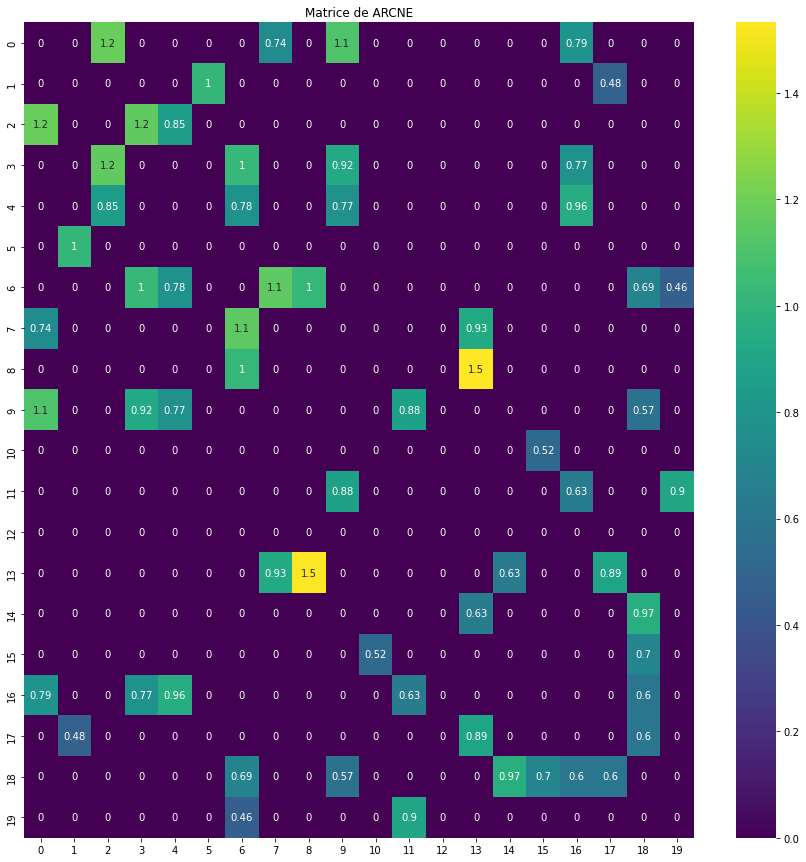

In [29]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(aracne_matrix,annot=True,cmap='viridis',cbar=True)
plt.title("Matrice de ARCNE")

In [31]:
## Adaptation de l'exo2 pour l'exo 5

def exo5(data_path,target_path,threshold = 0.4,bins=20):

    nb_network = data_path[-5]

    ## Chargement des données et visualisation 
    data = pd.read_csv(data_path)
    target = pd.read_csv(target_path)

    ## Utiliser la fonction de l'exercice 1 pour remplacer les valeurs manquantes
    data = replace_random_value(data)

    
    mi_matrix = information_mutuelle(data, bins=bins)
    aracne_matrix, Delete_link = ARACNE(mi_matrix, threshold)

    plt.figure(figsize=(15,15))
    sns.heatmap(aracne_matrix,annot=True,cmap='viridis',cbar=True)
    plt.title(f"Matrice de ARCNE pour le réseau {nb_network}")

    cause, effet, score  = [],[],[] 
    n=len(mutual_info_matrix)

    for i in range(n):
        for j in range(n):
            if i == j:
                score.append(0)
                cause.append(data.columns[i])
                effet.append(data.columns[j])
            else:
                score.append(aracne_matrix[i,j])
                cause.append(data.columns[i])
                effet.append(data.columns[j])
    
    
    predictions_network = pd.DataFrame(np.array([cause, effet, score]).T,columns=["cause", "effet", "score"])

    sorted_index = predictions_network['score'].sort_values(ascending=False).index #permets d'avoir les indices triés par décroissance au niveau du score

    predictions_network = predictions_network.iloc[sorted_index] #réordonner le dataset

    #predictions_network.to_csv(os.path.join(os.getcwd(),f"exo4_pred/predictions_network{nb_network}.csv"),index=False)

    #Question 4 

    n = len(aracne_matrix)

    causal_matrix = pd.DataFrame(np.zeros((n,n)),index=data.columns,columns=data.columns)

    for c1,c2 in zip(target.iloc[:,0].values,target.iloc[:,1].values):
        causal_matrix.loc[c1][c2] = 1

    copy_aracne_matrix = np.copy(aracne_matrix)

    flaten_causal_matrix = np.array(causal_matrix).flatten()
    flaten_matrix_corr = copy_aracne_matrix.flatten()

    # Calcul de la courbe précision/rappel
    precision, recall, thresholds = precision_recall_curve(flaten_causal_matrix, flaten_matrix_corr)

    # Affichage de la courbe
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f"courbe précision/rappel pour le réseau {nb_network}")
    plt.show()

    print(f"score de précision moyenne pour le réseau {nb_network} est de : ", average_precision_score(flaten_causal_matrix, flaten_matrix_corr))

    


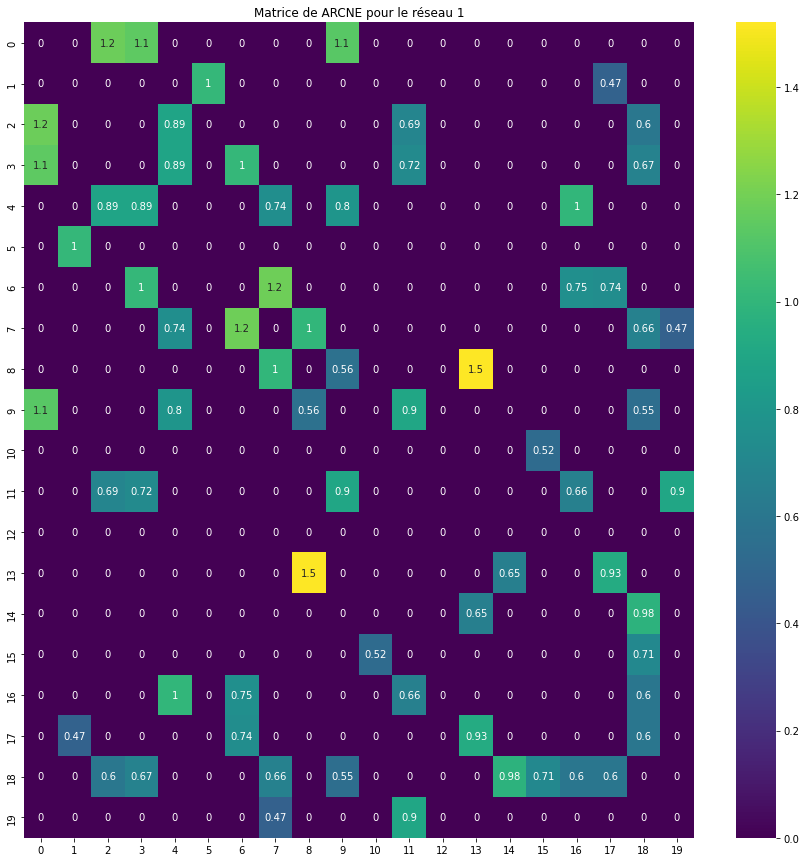

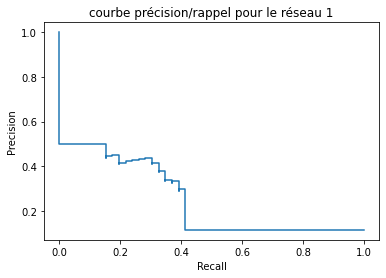

score de précision moyenne pour le réseau 1 est de :  0.24796565602272122


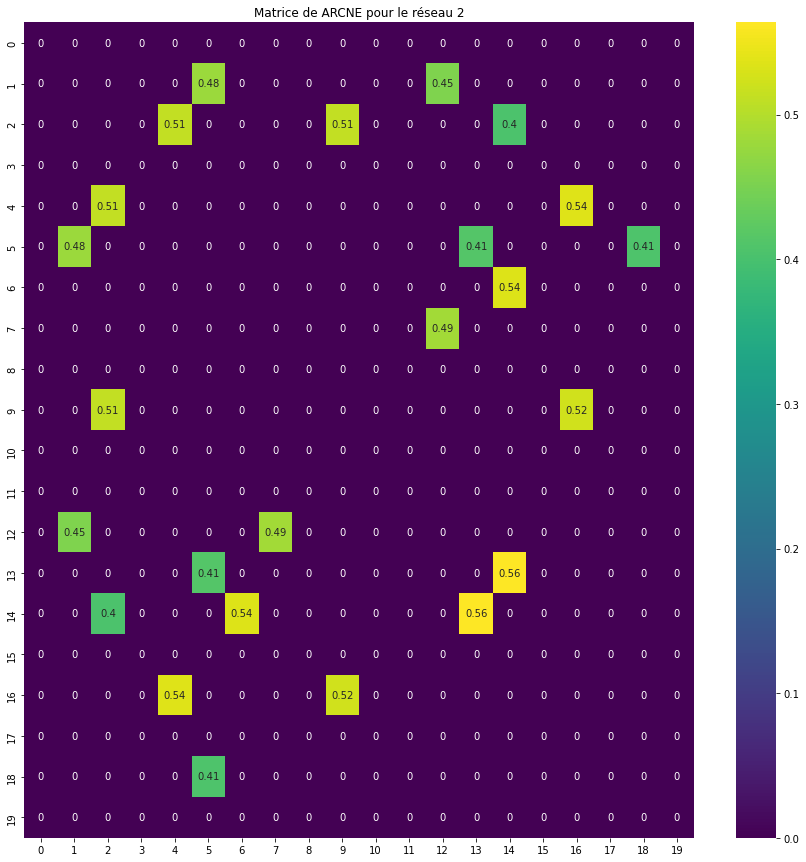

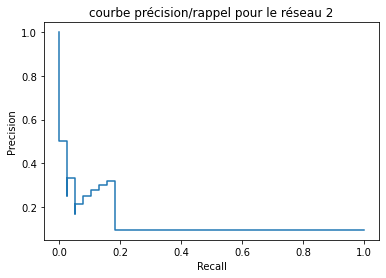

score de précision moyenne pour le réseau 2 est de :  0.13522575377838536


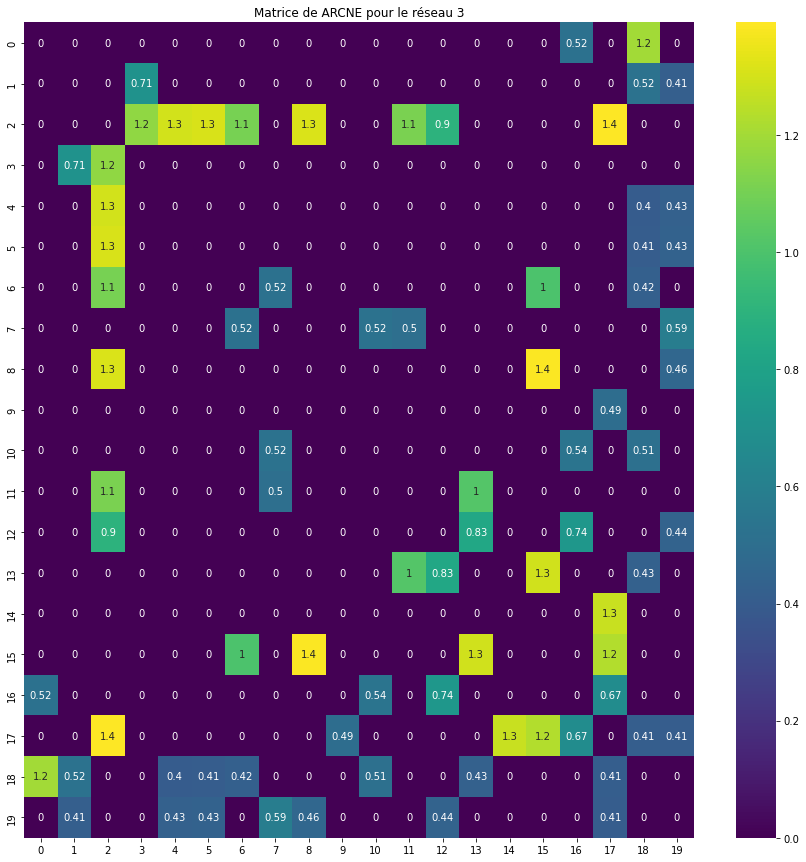

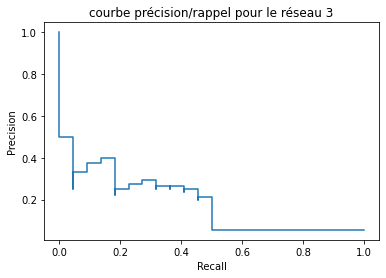

score de précision moyenne pour le réseau 3 est de :  0.1827562856038792


In [32]:
data_path ="/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Option Biologie/genetique_network/data_train(2)"
os.listdir(data_path)

for i in range(1,4):
    data_path_i = os.path.join(data_path,f'data{i}.csv')
    target_path_i = os.path.join(data_path,f'target{i}.csv')

    exo5(data_path_i,target_path_i)

## question 3

/usr/lib/python3/dist-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


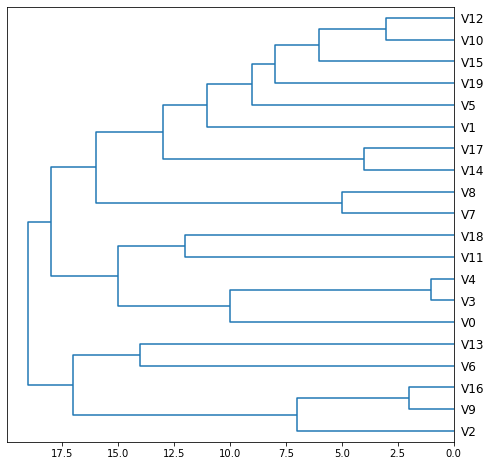

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(aracne_matrix)
AgglomerativeClustering(compute_full_tree=True)


dendro = [ ]
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])
    # le dernier coefficient devrait contenir le nombre de feuilles dépendant de ce noeud
    # et non le dernier indice
    # de même, le niveau (3ème colonne) ne devrait pas être le nombre de noeud
    # mais la distance de Ward

fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1,1,1)
r = dendrogram(dendro, color_threshold=1, labels=list(data.columns),
               show_leaf_counts=True, ax=ax, orientation="left")

In [36]:
target

,Cause,Effect
0,V0,V2
1,V0,V3
2,V0,V6
3,V0,V7
4,V0,V8
5,V0,V9
6,V0,V16
7,V1,V3
8,V1,V5
9,V1,V7


On remarque que cette méthode supprime beaucoup de liens entre les gènes. Nous pouvons le voir ci-dessus à l'aide du graphe d'ascendance hiérarchique, qui ne fait pas ressortir les véritables liaisons entre les gènes. De plus, on obtient des scores (précision/rappel) relativement faibles, un peu comme avec les méthodes précédentes. Ceci s'explique aussi par le fait que ces méthodes sont symétriques et fournissent nécessairement des erreurs de prédiction du fait que les liaisons ne sont pas dans les deux sens.